In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [93]:
#Read the data
df = pd.read_csv("50_Startups.csv")
df.head()

,RD,AT,MT,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [94]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RD      50 non-null     float64
 1   AT      50 non-null     float64
 2   MT      50 non-null     float64
 3   State   50 non-null     object 
 4   Profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [95]:
#check for missing values
df.isna().sum()

RD        0
AT        0
MT        0
State     0
Profit    0
dtype: int64

In [96]:
# Correlation Matrix¶

In [97]:
df.corr()

,RD,AT,MT,Profit
RD,1.000000,0.241955,0.724248,0.972900
AT,0.241955,1.000000,-0.032154,0.200717
MT,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [98]:
# Scatterplot between variables along with histograms

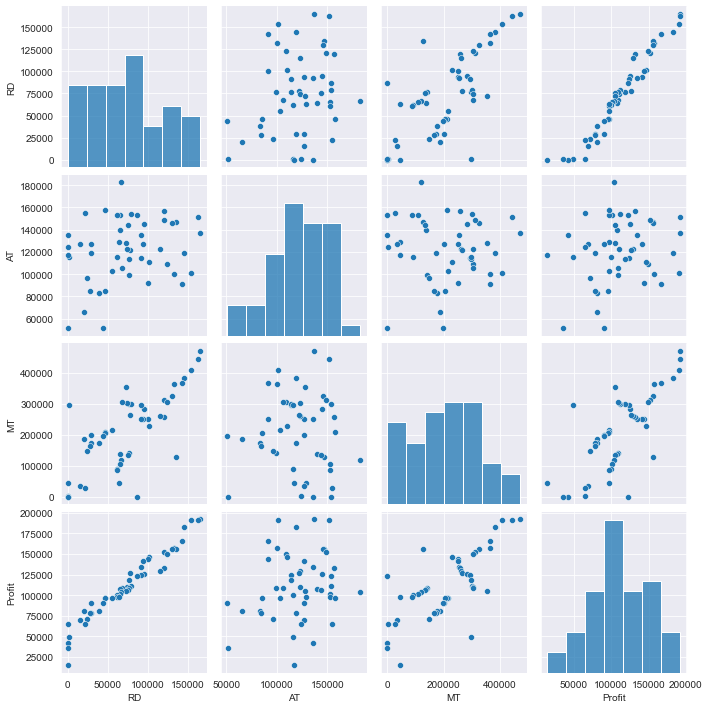

In [99]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [100]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [101]:
states = df.State.value_counts()

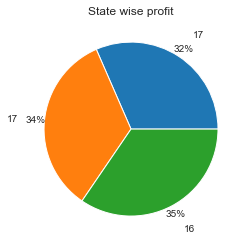

In [102]:
df1 = df.groupby(['State']).Profit.sum()
plt.pie(df1, labels=states, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)
plt.title('State wise profit')
plt.show()

array([[<AxesSubplot:xlabel='RD', ylabel='RD'>,
        <AxesSubplot:xlabel='AT', ylabel='RD'>,
        <AxesSubplot:xlabel='MT', ylabel='RD'>,
        <AxesSubplot:xlabel='Profit', ylabel='RD'>],
       [<AxesSubplot:xlabel='RD', ylabel='AT'>,
        <AxesSubplot:xlabel='AT', ylabel='AT'>,
        <AxesSubplot:xlabel='MT', ylabel='AT'>,
        <AxesSubplot:xlabel='Profit', ylabel='AT'>],
       [<AxesSubplot:xlabel='RD', ylabel='MT'>,
        <AxesSubplot:xlabel='AT', ylabel='MT'>,
        <AxesSubplot:xlabel='MT', ylabel='MT'>,
        <AxesSubplot:xlabel='Profit', ylabel='MT'>],
       [<AxesSubplot:xlabel='RD', ylabel='Profit'>,
        <AxesSubplot:xlabel='AT', ylabel='Profit'>,
        <AxesSubplot:xlabel='MT', ylabel='Profit'>,
        <AxesSubplot:xlabel='Profit', ylabel='Profit'>]], dtype=object)

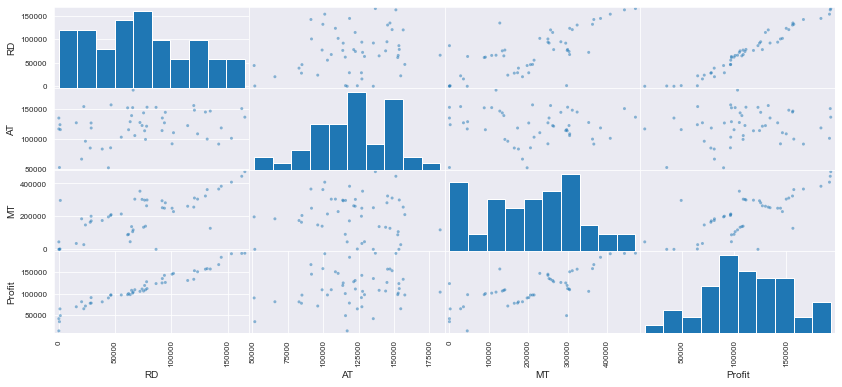

In [103]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(14, 6), diagonal="hist", grid = True)

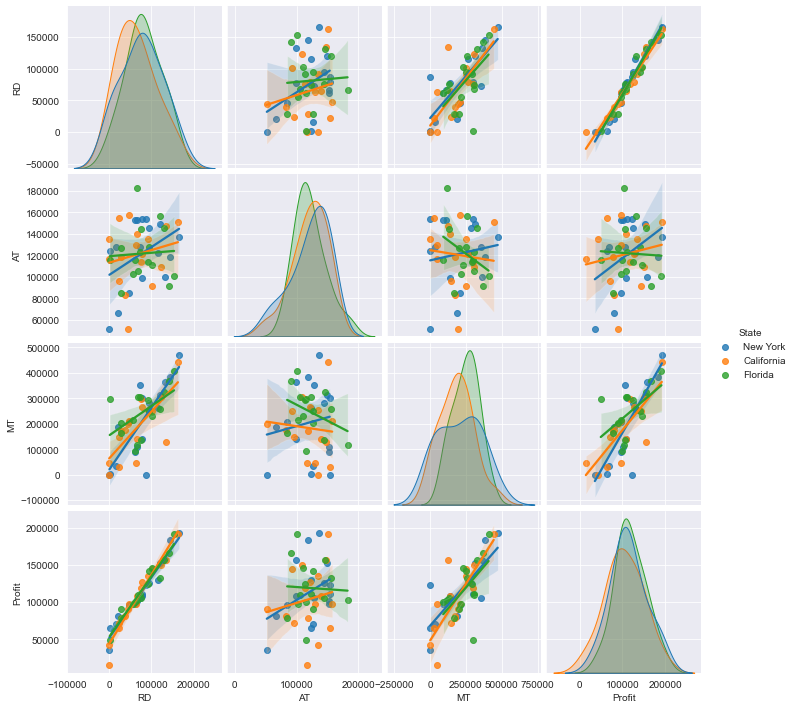

In [104]:
sns.pairplot(df,kind='reg',hue = 'State')


In [105]:
df.drop(['State'],axis = 1, inplace = True)
df.head()

,RD,AT,MT,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD+AT+MT',data=df).fit()

In [ ]:
#Coefficients
model.summary() 

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj) 

In [ ]:
#Simple Linear Regression Models

In [ ]:
ml_v=smf.ols('Profit~AT',data = df).fit()   
#t and p-Values
print(ml_v.tvalues, '\n', ml_v.pvalues)  

In [ ]:
ml_w=smf.ols('Profit~MT',data = df).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues)  

In [ ]:
ml_w=smf.ols('Profit~AT+MT',data = df).fit()  
print(ml_w.tvalues, '\n', ml_w.pvalues) 

In [ ]:
# Calculating VIF

In [ ]:
rsq_rd = smf.ols('RD~AT+MT',data=df).fit().rsquared  
vif_rd = 1/(1-rsq_rd) # 16.33

rsq_at = smf.ols('AT~RD+MT',data=df).fit().rsquared  
vif_at = 1/(1-rsq_at) # 564.98

rsq_mt = smf.ols('MT~RD+AT',data=df).fit().rsquared  
vif_mt= 1/(1-rsq_mt) #  564.84

# Storing vif values in a data frame
d1 = {'Variables':['RD','AT','MT'],'VIF':[vif_rd,vif_at,vif_mt,]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

In [ ]:
 # Residual Analysis

In [ ]:
 #Test for Normality of Residuals (Q-Q Plot)

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>10)) 

In [ ]:
#Residual Plot for Homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
#Residual Vs Regressors

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_regress_exog(model, "AT", fig=fig)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MT", fig=fig)
plt.show()

In [ ]:
#Model Deletion Diagnostics

In [ ]:
#Detecting Influencers/Outliers

In [ ]:
#Cook’s Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))  
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) 

In [ ]:
#High Influence points

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k = 3
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

In [ ]:
#From the above plot, it is evident that data point 45 and 49 are the influencers¶

In [ ]:
df[df.index.isin([45, 49])] 

In [ ]:
#See the differences in RD and other variable values
df.head()

In [ ]:
#Improving the model¶

In [ ]:
#Load the data
df1_new = pd.read_csv("50_Startups.csv")

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
df1=df1_new.drop(df1_new.index[[45,49]],axis=0).reset_index()

In [ ]:
#Drop the original index
df1=df1.drop(['index'],axis=1)

In [ ]:
df1

In [ ]:
#Build Model

In [ ]:
#Exclude variable "AT" and generate R-Squared and AIC values
final_ml_M= smf.ols('Profit~RD+MT',data = df).fit()

In [ ]:
(final_ml_M.rsquared,final_ml_M.aic,final_ml_M.bic)

In [ ]:
#Exclude variable "MS" and generate R-Squared and AIC values
final_ml_A= smf.ols('Profit~AT+RD',data = df).fit() 

In [ ]:
(final_ml_A.rsquared,final_ml_A.aic,final_ml_A.bic) 

In [ ]:
#Comparing above R-Square and AIC values, model 'final_ml_V' has high R- square and low AIC value hence include variable 'MT' so that multi collinearity problem would be resolved.

In [ ]:
#Cook’s Distance¶

In [ ]:
model_influence_M= final_ml_M.get_influence()
(c_M, _) = model_influence_M.cooks_distance

In [ ]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_M,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_M),np.max(c_M))

In [ ]:
#Drop 45
df2=df1.drop(df.index[[45]],axis=0)

In [ ]:
df2

In [ ]:
#Reset the index and re arrange the row values
df3=df2.reset_index()

In [ ]:
df4=df3.drop(['index'],axis=1)

In [ ]:
df4

In [ ]:
#Build the model on the new data
final_ml_v= smf.ols('Profit~RD+AT+MT',data = df4).fit()

In [ ]:
#Again check for influencers
model_influence_v = final_ml_v.get_influence()
(c_v, _) = model_influence_v.cooks_distance

In [ ]:
#index of the data points where c is more than .5
(np.argmax(c_v),np.max(c_v))

In [ ]:
df5=df4.drop(df1.index[[46]],axis=0) 
df5 

In [ ]:
df6=df5.reset_index() 
df6 
#car6=car5.drop(['index'],axis=1

In [ ]:
df7=df6.drop(['index'],axis=1) 
df7 

In [ ]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [ ]:
#Since the value is <1 , we can stop the diagnostic process and finalize the model

Type Markdown and LaTeX:  𝛼2


In [ ]:
#Check the accuracy of the mode
final_ml_v= smf.ols('Profit~RD+AT+MT',data = df7).fit()

In [ ]:
(final_ml_v.rsquared,final_ml_v.aic,final_ml_v.bic)

In [ ]:
model_influence_v= final_ml_v.get_influence()

In [ ]:
ig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_v,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [ ]:
(np.argmax(c_v),np.max(c_v))

In [ ]:
#Predicting for new data

In [ ]:
#New data for prediction
new_data=pd.DataFrame({'RD':40,"AT":95,"MT":102,"ST":35},index=[1])

In [ ]:
#Type Markdowaszzxn and LaTeX:  𝛼2

In [ ]:
final_ml_v.predict(new_data)

In [ ]:
final_ml_v.predict(df1_new.iloc[0:5,])

In [ ]:
pred_y = final_ml_v.predict(df1_new)

In [ ]:
pred_y 